In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Produksi Tambang Mineral Fixed.xlsx')

In [3]:
data.head()

,Barang_Tambang,Tahun,Total
0,Batu Bara,1996,50332047.0
1,Bauksit,1996,841976.0
2,Nikel,1996,3426867.0
3,Emas,1996,83564.0
4,Perak,1996,255404.0


# Laju Pertumbuhan Hasil Tambang Mineral 'Batu Bara'

In [4]:
data_batu_bara = data[data['Barang_Tambang'] == 'Batu Bara']
data_bb_year = data_batu_bara[data_batu_bara['Tahun'] > 2014]
data_bb_year.head(20)

,Barang_Tambang,Tahun,Total
190,Batu Bara,2015,405871432.0
200,Batu Bara,2017,461087221.0
210,Batu Bara,2018,557983706.0
220,Batu Bara,2019,616154054.0
230,Batu Bara,2020,565640928.0
240,Batu Bara,2021,614058577.0


In [5]:
def plotting_barang_tambang(data, title):
    x_values = data['Tahun']
    y_values = data['Total']
    plt.figure(figsize=(15,5))
    sns.lineplot(x=x_values, y=y_values)
    for x,y in zip(x_values, y_values):
        plt.text(x,y, str(y), ha='center', va='bottom')
    plt.title(title)
    plt.show()

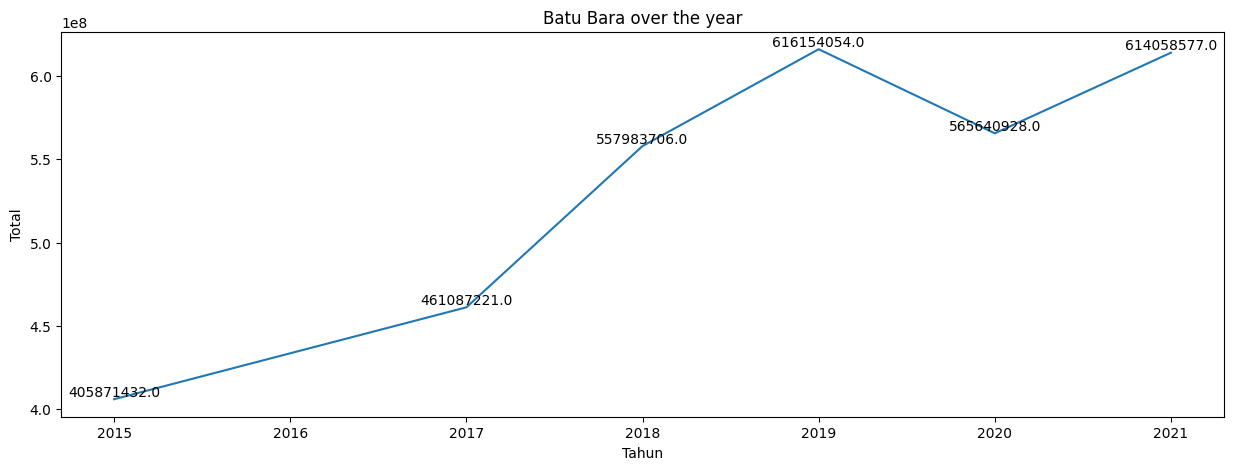

In [6]:
plotting_barang_tambang(data_bb_year, 'Batu Bara over the year')

# Laju Pertumbuhan Hasil Tambang Mineral 'Bauksit'

In [7]:
data_bauksit = data[data['Barang_Tambang'] == 'Bauksit']
data_bauksit_year = data_bauksit[data_bauksit['Tahun'] > 2014]
data_bauksit_year.head(20)

,Barang_Tambang,Tahun,Total
191,Bauksit,2015,0.0
201,Bauksit,2017,1294236.0
211,Bauksit,2018,5693640.0
221,Bauksit,2019,16592187.0
231,Bauksit,2020,25859895.0
241,Bauksit,2021,25781187.0


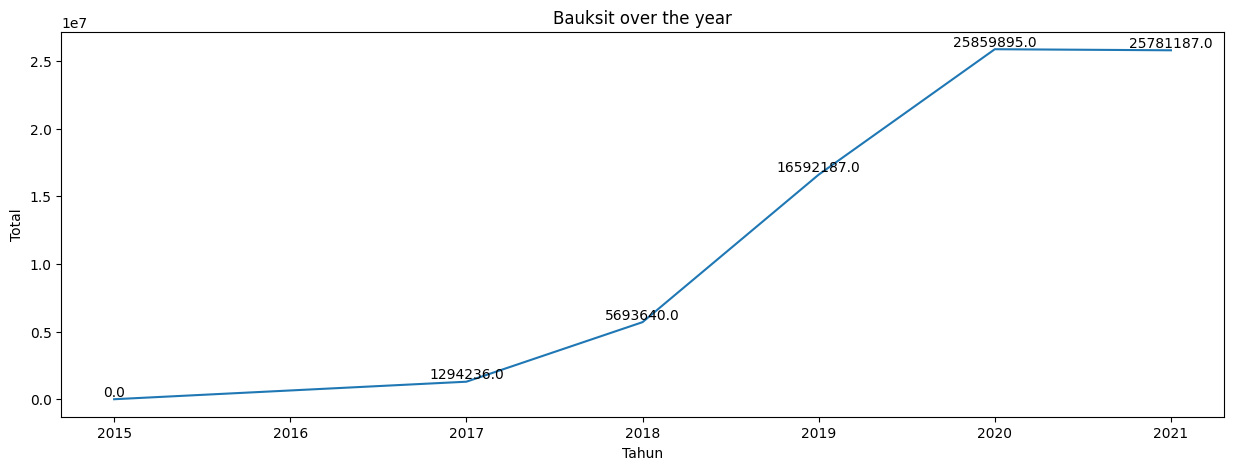

In [8]:
plotting_barang_tambang(data_bauksit_year, 'Bauksit over the year')

# Laju Pertumbuhan Hasil Tambang Mineral 'Emas'

In [9]:
data_emas = data[data['Barang_Tambang'] == 'Emas']
data_emas_year = data_emas[data_emas['Tahun'] > 2014]
data_emas_year.head(20)

,Barang_Tambang,Tahun,Total
193,Emas,2015,92339.0
203,Emas,2017,100514.0
213,Emas,2018,132734.0
223,Emas,2019,108977.0
233,Emas,2020,65890.0
243,Emas,2021,78996.0


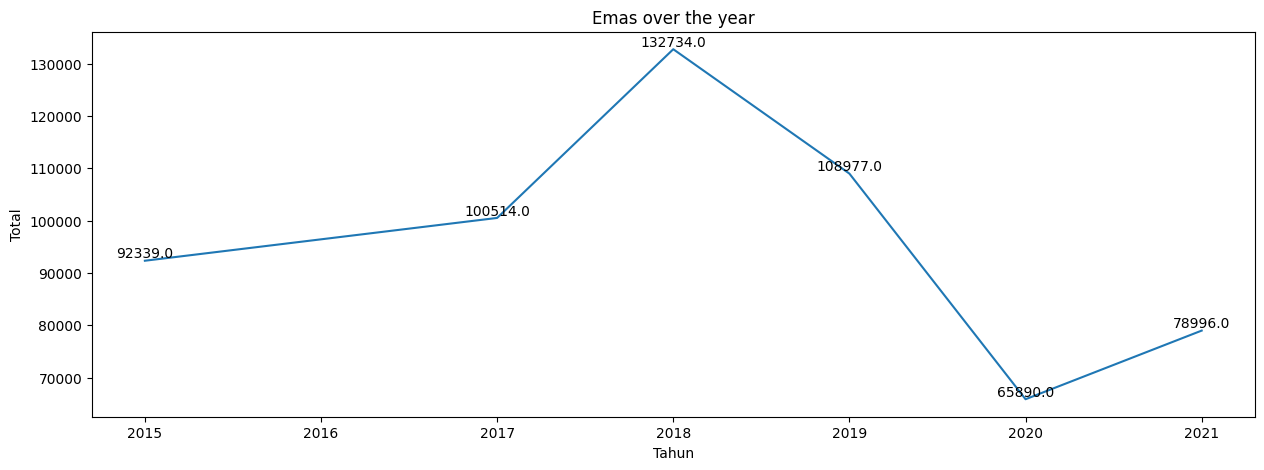

In [10]:
plotting_barang_tambang(data_emas_year, 'Emas over the year')

# Rata Rata Barang Tambang

In [11]:
data.Barang_Tambang.unique()

array(['Batu Bara', 'Bauksit', 'Nikel', 'Emas', 'Perak', 'Granit',
       'Pasir Besi', 'Konsentrat Tin', 'Konsentrat Tembaga',
       'Bijih Nikel'], dtype=object)

In [31]:
data_bt = data[data['Barang_Tambang'] != 'Batu Bara']

data_mean_tambang = data_bt.groupby('Barang_Tambang')['Total'].mean().sort_values(ascending=False)

In [32]:
data_mean_tambang.head()

Barang_Tambang
Bijih Nikel    12057076.36
Bauksit         4866470.16
Pasir Besi      3541452.28
Granit          2882032.76
Nikel           2755875.80
Name: Total, dtype: float64

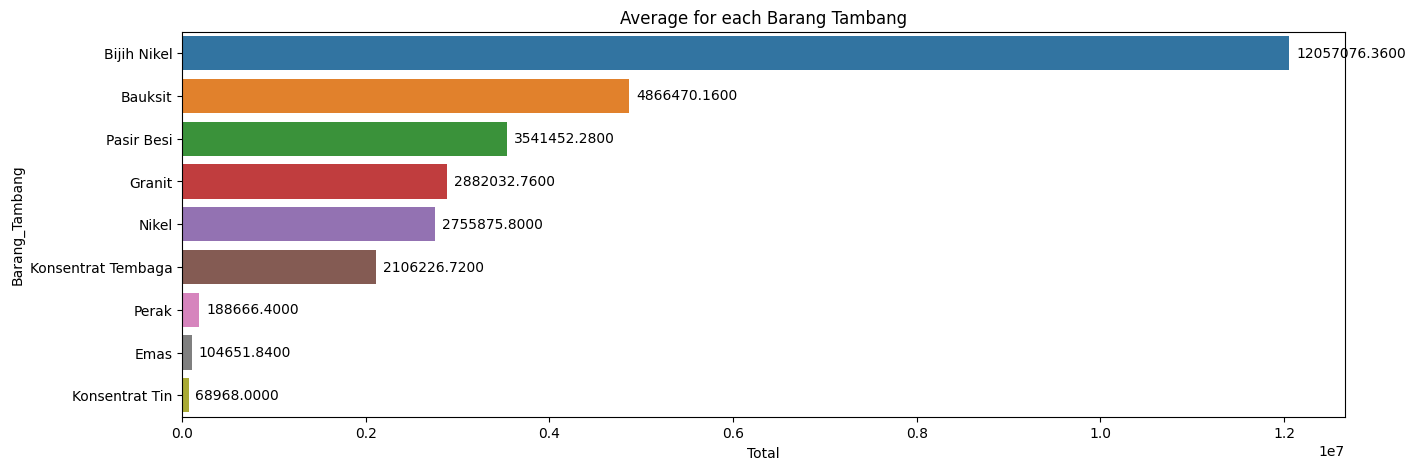

In [35]:
plt.figure(figsize=(15,5))
ax= sns.barplot(x= data_mean_tambang.values, y=data_mean_tambang.index)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_xlabel('Total')
ax.set_title('Average for each Barang Tambang')
plt.show()